In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import chardet


#### Testando correlação:

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir caminho para o arquivo
dados0 = '/content/drive/MyDrive/spotify-2023.csv'

# Detectar codificação
with open(dados0, 'rb') as f:
    result = chardet.detect(f.read(10000))
encoding_detectado = result['encoding']
print(f'Encoding detectado: {encoding_detectado}')

# Ler dataset com codificação correta e separador explícito
dados = pd.read_csv(dados0, encoding=encoding_detectado, sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Encoding detectado: ISO-8859-1


In [ ]:
dados.head(4)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Exclusão de dados ausentes
dados.dropna(inplace=True)
dados.drop(574, axis=0, inplace=True)

In [ ]:
# Conversão dos dados object em numéricos
dados['in_deezer_playlists'] = dados['in_deezer_playlists'].astype(str).str.replace(',', '')
dados['streams'] = dados['streams'].astype(str).str.replace(',', '')
dados['in_shazam_charts'] = dados['in_shazam_charts'].astype(str).str.replace(',', '')

dados['streams'] = pd.to_numeric(dados['streams'])
dados['in_deezer_playlists'] = pd.to_numeric(dados['in_deezer_playlists'])
dados['in_shazam_charts'] = pd.to_numeric(dados['in_shazam_charts'])

In [ ]:
# Seleção do tipo de dados numéricos
dados_numericos = dados.select_dtypes(include=np.number) # usei uma função do pandas que seleciona o tipo de dados númericos do numpy

In [ ]:
# Visualização do conjunto numérico
dados_numericos.head(4)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,45,10,826,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,55,58,72,11,0,11,15


In [ ]:
# Índices do conjunto numérico
dados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          816 non-null    int64
 1   released_year         816 non-null    int64
 2   released_month        816 non-null    int64
 3   released_day          816 non-null    int64
 4   in_spotify_playlists  816 non-null    int64
 5   in_spotify_charts     816 non-null    int64
 6   streams               816 non-null    int64
 7   in_apple_playlists    816 non-null    int64
 8   in_apple_charts       816 non-null    int64
 9   in_deezer_playlists   816 non-null    int64
 10  in_deezer_charts      816 non-null    int64
 11  in_shazam_charts      816 non-null    int64
 12  bpm                   816 non-null    int64
 13  danceability_%        816 non-null    int64
 14  valence_%             816 non-null    int64
 15  energy_%              816 non-null    int64
 16  acousticness_

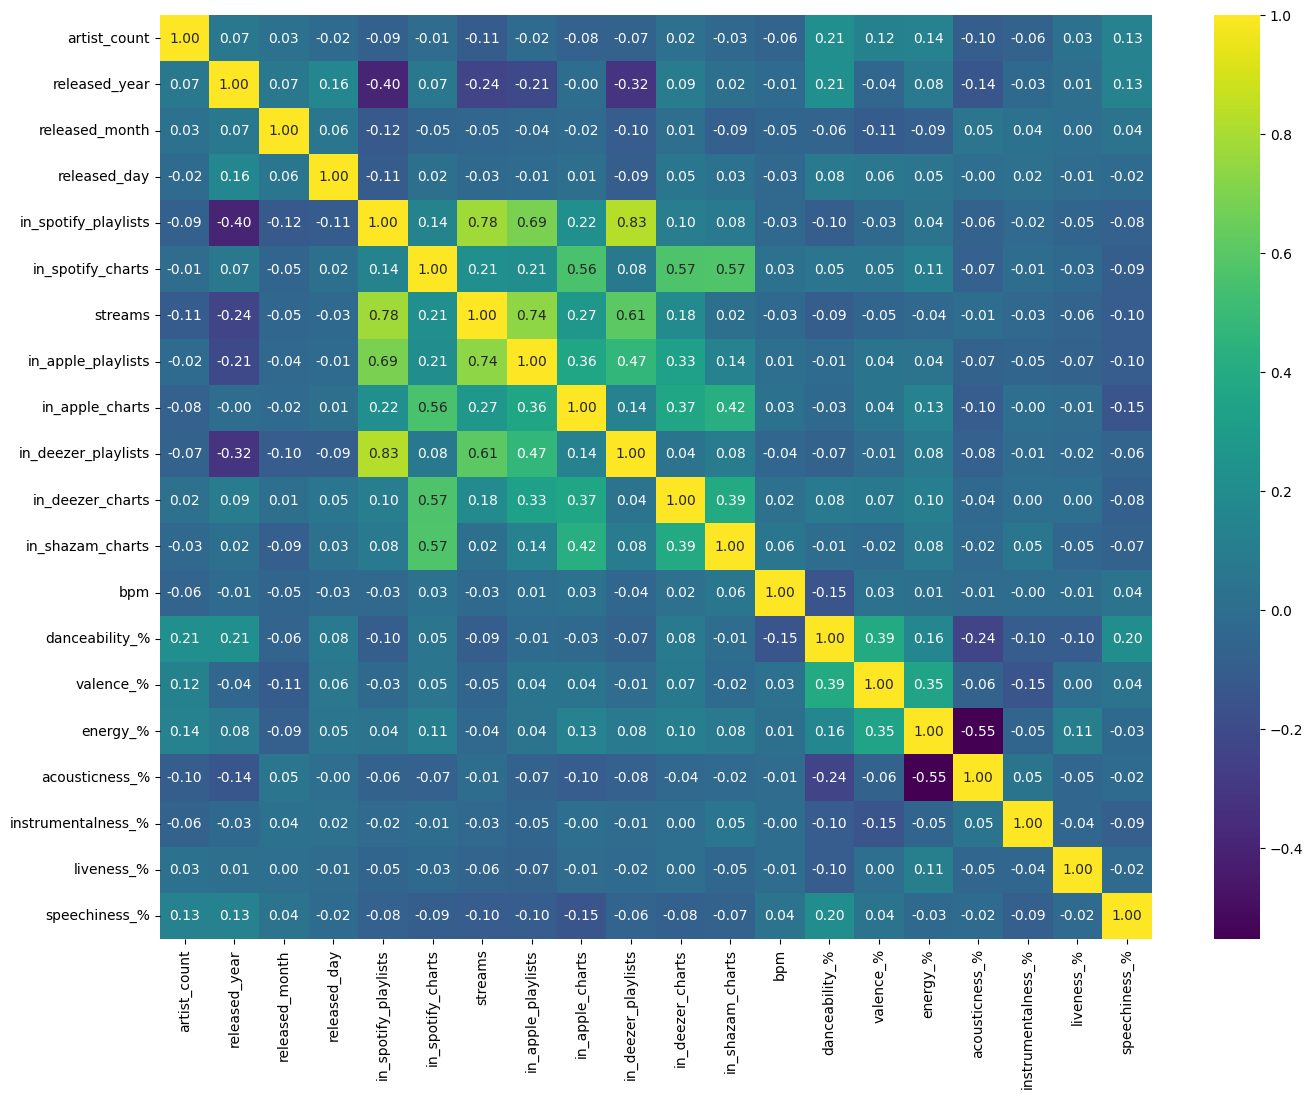

In [ ]:
# Matriz de correlação
plt.figure(figsize=(16, 12))
correlacao_dados_numericos = dados_numericos.corr()
sns.heatmap(correlacao_dados_numericos, cmap='viridis', annot=True, fmt=".2f")
plt.show()

#### Regressão Linear: variável y 'streams'

In [ ]:
dados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          816 non-null    int64
 1   released_year         816 non-null    int64
 2   released_month        816 non-null    int64
 3   released_day          816 non-null    int64
 4   in_spotify_playlists  816 non-null    int64
 5   in_spotify_charts     816 non-null    int64
 6   streams               816 non-null    int64
 7   in_apple_playlists    816 non-null    int64
 8   in_apple_charts       816 non-null    int64
 9   in_deezer_playlists   816 non-null    int64
 10  in_deezer_charts      816 non-null    int64
 11  in_shazam_charts      816 non-null    int64
 12  bpm                   816 non-null    int64
 13  danceability_%        816 non-null    int64
 14  valence_%             816 non-null    int64
 15  energy_%              816 non-null    int64
 16  acousticness_

In [ ]:
# Variáveis independentes:
X_streams = dados_numericos.drop(columns=['streams'], axis=1)

# Variável dependente: '_streams' (que será predita)
y_streams = dados_numericos.iloc[:, 6]

# Constante Statsmodels
X_sm_streams = sm.add_constant(X_streams)

# Regressão do modelo no Statsmodels
resultados_sm_streams = sm.OLS(y_streams, X_sm_streams).fit()

print(resultados_sm_streams.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     109.3
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          1.04e-206
Time:                        00:49:28   Log-Likelihood:                -17015.
No. Observations:                 816   AIC:                         3.407e+04
Df Residuals:                     796   BIC:                         3.416e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -4.51e+09 

In [ ]:
# Novas variáveis independentes:
X_streams = dados_numericos.iloc[:, [0,1,4,5,7,11,]]

# Variável dependente: '_streams' (que será predita)
y_streams = dados_numericos.iloc[:, 6]

# Constante Statsmodels
X_sm_streams = sm.add_constant(X_streams)

# Regressão do modelo no Statsmodels
resultados_sm_streams = sm.OLS(y_streams, X_sm_streams).fit()

print(resultados_sm_streams.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     334.6
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          3.01e-215
Time:                        00:54:04   Log-Likelihood:                -17030.
No. Observations:                 816   AIC:                         3.407e+04
Df Residuals:                     809   BIC:                         3.411e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.844e+09 

In [ ]:
print('Equação da Regressão Linear Múltipla \n Y = B0 + B1 * X1 + B2 * X2 ... Bn * Xn')
print('\nY = ',
      resultados_sm_streams.params['const'], '+',
      resultados_sm_streams.params['artist_count'], '* artist_count +',
      resultados_sm_streams.params['released_year'], '* released_year +',
      resultados_sm_streams.params['in_spotify_playlists'], '* in_spotify_playlists +',
      resultados_sm_streams.params['in_spotify_charts'], '* in_spotify_charts +',
      resultados_sm_streams.params['in_apple_playlists'], '* in_apple_playlists +',
      resultados_sm_streams.params['in_shazam_charts'], '* in_shazam_charts')

Equação da Regressão Linear Múltipla 
 Y = B0 + B1 * X1 + B2 * X2 ... Bn * Xn

Y =  -3843933716.384942 + -38986361.09509561 * artist_count + 1995084.9228134488 * released_year + 35659.39854682979 * in_spotify_playlists + 4449641.87081464 * in_spotify_charts + 2584279.178746511 * in_apple_playlists + -588427.957513435 * in_shazam_charts
